In [1]:
%matplotlib inline
import re
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import expit as sigmoid

from malib import GDClassifier, SGDClassifier

plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey', ls=':')
# plt.rc('image', cmap='Greys', interpolation='none')
plt.rc('font', family='serif', serif=['XCharter'])
# plt.rc('mathtext', fontset='dejavuserif') - default
plt.rc('savefig', bbox='tight', pad_inches=0.1, format='pdf')
# plt.rc('pdf', fonttype=3) - default
# plt.rc('ps', fonttype=3) - default
# np.set_printoptions(floatmode='fixed', precision=3)

In [3]:
import csv

# dataset is quite small, so we'll
# store it in RAM
def prepro(fname):
    with open(fname, 'r', newline='') as fin:
        reader = csv.reader(fin, delimiter=',')
        _ = next(reader)
        i = 0
        X_corpus = []
        y = []
        for line in reader:
            X_corpus += [re.sub(r'[^a-z0-9]+', ' ', line[1].lower()).strip()]
            y += [1 if line[2] == 'True' else -1]
        return X_corpus, np.array(y)

def train_shuffle(X, y, seed=0):
    rng = np.random.default_rng(seed=seed)
    inds = rng.permutation(len(y))
    return X[inds], y[inds]

def train_val_split(X, y, train_size, shuffle=False, seed=0):
    if shuffle:
        X, y = train_shuffle(X, y, seed)
    return X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [4]:
# dir0 = '/kaggle/input/prac-toxic/'
dir0 = './data_toxic/'
X_train_corpus, y_train = prepro(dir0 + 'toxic_train.csv')
X_test_corpus, y_test = prepro(dir0 + 'toxic_test.csv')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)
X_train = vectorizer.fit_transform(X_train_corpus)
X_test = vectorizer.transform(X_test_corpus)
X_train.shape

(52061, 18253)

In [6]:
Xtr, Xv, ytr, yv = train_val_split(X_train, y_train, 40000, shuffle=True)
val_set = [Xv, yv]

In [7]:
(yv == 1).mean(), (ytr == 1).mean()

(0.31780117734847857, 0.3098)

In [8]:
def fastinfo():
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    if 'epoch_num' in history:
        iters = history['epoch_num']
    else:
        iters = np.arange(len(history['func']))
    plt.plot(iters, history['func'])
    plt.subplot(1,2,2)
    plt.plot(iters, history['accuracy'])
    print(f'time: {np.sum(history["time"]):3f} secs')
    print(f'accy: {(model.predict(X_test) == y_test).mean():.3f}')

def rng(seed=0):
    return np.random.default_rng(seed=seed)

In [9]:
default_colors = [i['color'] for i in mpl.rcParams['axes.prop_cycle'].__dict__['_left']]
default_colors
custom_colors = [
    'pink',
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22',
    '#17becf',
]
custom_cycler = plt.cycler(color=custom_colors)

# Исследование $\alpha$ и $\beta$

In [10]:
betas = [0, 0.1, 0.5, 1, 2]
alphas = np.logspace(1, -3, 5)

In [13]:
histories = {}
for beta in betas:
    for alpha in alphas:
        model = GDClassifier(step_alpha=alpha, step_beta=beta)
        histories[(beta, alpha)] = model.fit(Xtr, ytr, val_set=val_set)

  1%|▏         | 13/1000 [00:00<00:26, 37.89it/s]


'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


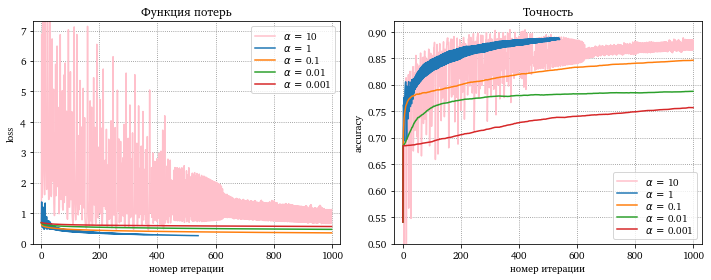

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


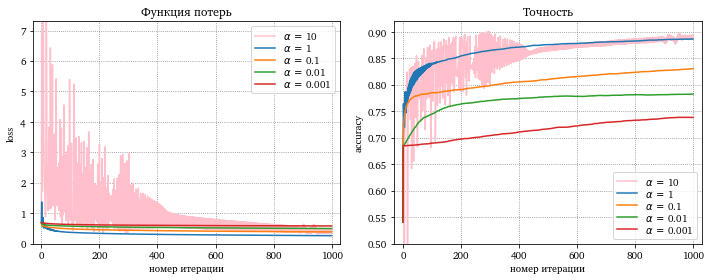

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


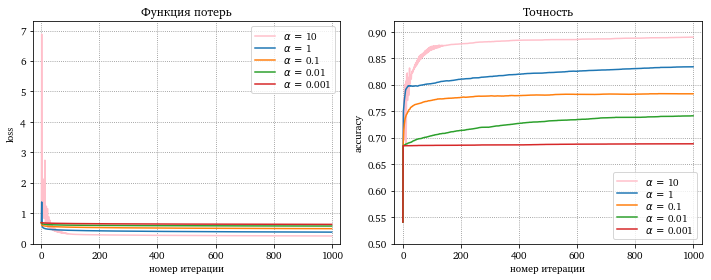

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


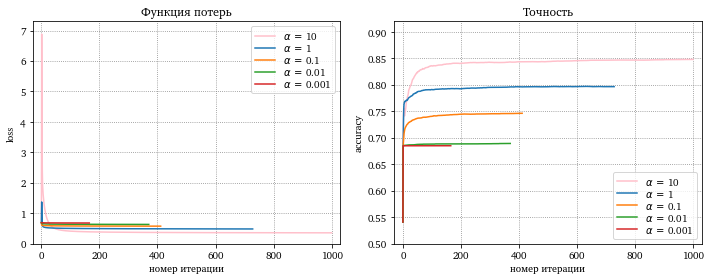

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


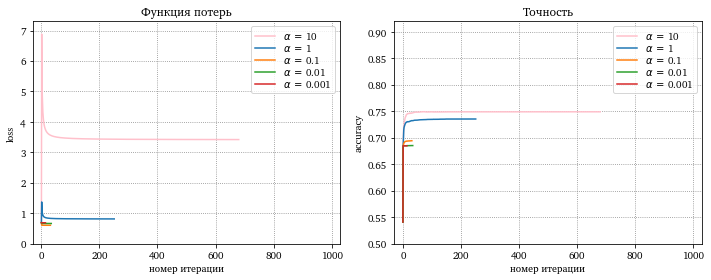

In [68]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.gca().set_prop_cycle(custom_cycler)
    plt.title(f'Функция потерь')
    for alpha in alphas:
        y = histories[beta, alpha]['func']
        x = np.arange(len(y))
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('номер итерации')
        plt.ylabel('loss')
        plt.ylim(0, 7.3)
        plt.xlim(-30, 1030)
    plt.legend(labelspacing=0.1)
    plt.subplot(1,2,2)
    plt.gca().set_prop_cycle(custom_cycler)
    plt.title(r'Точность')
    for alpha in alphas:
        y = histories[beta, alpha]['accuracy']
        x = np.arange(len(y))
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('номер итерации')
        plt.ylabel('accuracy')
        plt.ylim(0.5, 0.92)
        plt.xlim(-30, 1030)
    plt.legend(labelspacing=0.1)
    plt.tight_layout()
    plt.savefig(f'vis/ab_gd_{i}')
    plt.show()
#     a = input()
# print(sorted(histories.keys(), key=lambda k:-histories[k]['accuracy'][-1])[:5])

In [16]:
histories = {}
for beta in betas:
    for alpha in alphas:
        model = SGDClassifier(step_alpha=alpha, step_beta=beta)
        histories[(beta, alpha)] = model.fit(Xtr, ytr, val_set=val_set)

  4%|▍         | 38/1000 [00:02<01:08, 14.01it/s]


In [20]:
betas

[0, 0.1, 0.5, 1, 2]

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


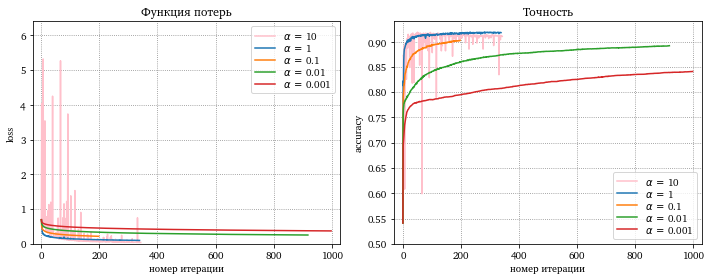

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


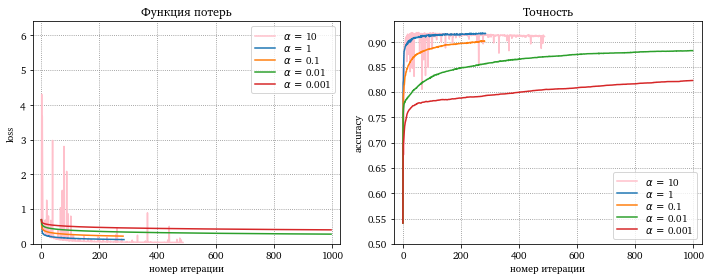

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


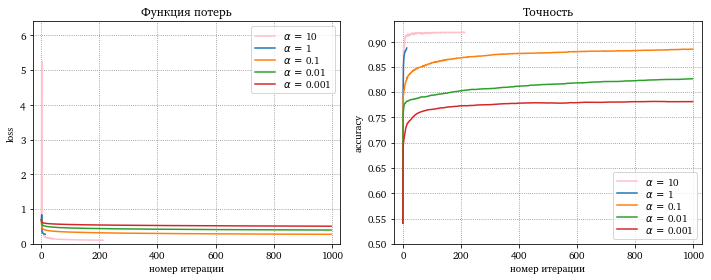

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


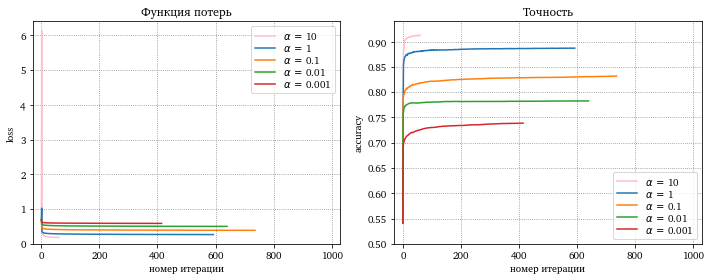

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


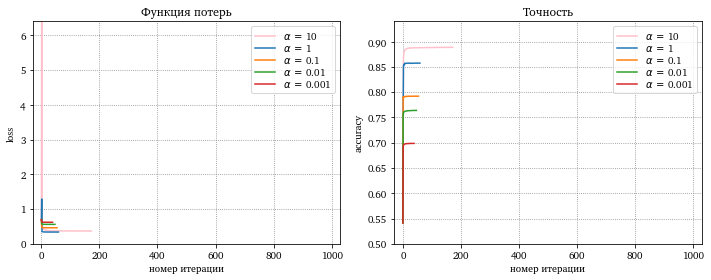

In [19]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.gca().set_prop_cycle(custom_cycler)
    plt.title(f'Функция потерь')
    for alpha in alphas:
        y = histories[beta, alpha]['func']
        x = histories[beta, alpha]['epoch_num']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('номер итерации')
        plt.ylabel('loss')
        plt.ylim(0, 6.4)
        plt.xlim(-30, 1030)
    plt.legend(labelspacing=0.1)
    plt.subplot(1,2,2)
    plt.gca().set_prop_cycle(custom_cycler)
    plt.title(r'Точность')
    for alpha in alphas:
        y = histories[beta, alpha]['accuracy']
        x = histories[beta, alpha]['epoch_num']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('номер итерации')
        plt.ylabel('accuracy')
        plt.ylim(0.5, 0.94)
        plt.xlim(-30, 1030)
    plt.legend(labelspacing=0.1)
    plt.tight_layout()
    plt.savefig(f'vis/ab_sgd_{i}')
    plt.show()

# Инициализация весов

In [81]:
n = Xtr.shape[1]
lim_sqr = 1 / np.sqrt(n)
lim_rev = 1 / (2 * n)

In [209]:
w_0s = [
    np.zeros(n),
    np.ones(n),
    rng().uniform(-lim_sqr, lim_sqr, size=n),
    rng().uniform(-lim_rev, lim_rev, size=n),
    Xtr.T.dot(ytr) / (np.array(Xtr.power(2).sum(axis=0))[0] + 1),
]

intercept_0s = [
    0,
    0,
    0,
    0,
    np.mean(ytr),
]

names = [str(i)+'.' for i in range(1, 6)]

In [188]:
model = GDClassifier()

histories = {}

for name, w_0, intercept_0 in zip(names, w_0s, intercept_0s):
    histories[name] = model.fit(Xtr, ytr, w_0=w_0, intercept_0=intercept_0, val_set=val_set)

100%|██████████| 1000/1000 [00:38<00:00, 26.13it/s]


In [121]:
pnames = [
    '0',
    '1',
    r'$U[-\frac{1}{2d},\frac{1}{2d}]$',
    r'$U[-\frac{1}{\sqrt{d}},\frac{1}{\sqrt{d}}]$',
    r"$\frac{\left<{y}, {x}_i'\right>}{\left<{x}_i',{x}_i'\right>}$",
]

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


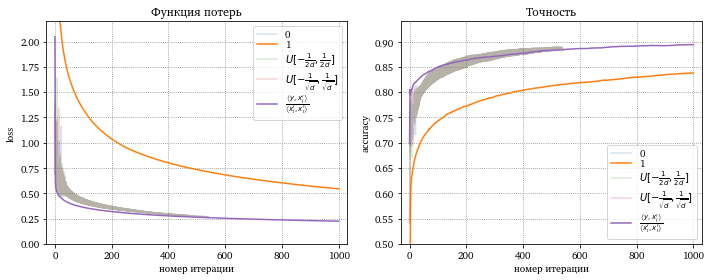

In [189]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for name, pname in zip(names, pnames):
    y = histories[name]['func']
    x = np.arange(len(y))
    if name in ['1.', '3.', '4.']:
        aa = 0.2
    else:
        aa = 1
    plt.plot(x, y, label=pname, alpha=aa)
    plt.xlabel('номер итерации')
    plt.ylabel('loss')
    plt.ylim(0, 2.2)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for name, pname in zip(names, pnames):
    y = histories[name]['accuracy']
    x = np.arange(len(y))
    if name in ['1.', '3.', '4.']:
        aa = 0.2
    else:
        aa = 1
    plt.plot(x, y, label=pname, alpha=aa)
    plt.xlabel('номер итерации')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/init_gd')
plt.show()

In [212]:
model = SGDClassifier()

histories = {}

for name, w_0, intercept_0 in zip(names, w_0s, intercept_0s):
    histories[name] = model.fit(Xtr, ytr, w_0=w_0, intercept_0=intercept_0, val_set=val_set)

  9%|▉         | 89/1000 [00:11<01:52,  8.09it/s]


'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


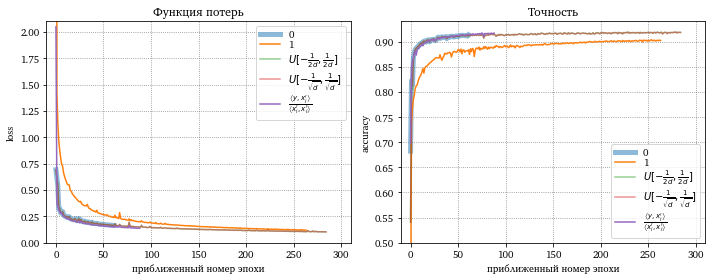

In [227]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for name, pname in zip(names, pnames):
    y = histories[name]['func']
    x = np.arange(len(y))
    if name == '1.':
        lw = 5
    else:
        lw = 1.5
    if name in ['1.', '3.', '4.']:
        aa = 0.5
    else:
        aa = 1
    plt.plot(x, y, label=pname, alpha=aa, lw=lw)
    plt.xlabel('приближенный номер эпохи')
    plt.ylabel('loss')
    plt.ylim(0, 2.1)
    plt.xlim(-10, 310)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for name, pname in zip(names, pnames):
    y = histories[name]['accuracy']
    x = np.arange(len(y))
    if name == '1.':
        lw = 5
    else:
        lw = 1.5
    if name in ['1.', '3.', '4.']:
        aa = 0.5
    else:
        aa = 1
    plt.plot(x, y, label=pname, alpha=aa, lw=lw)
    plt.xlabel('приближенный номер эпохи')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
    plt.xlim(-10, 310)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/init_sgd')
plt.show()

In [133]:
(yv == 1).mean()

0.31780117734847857

In [136]:
((Xv.sum(axis=1)+1) < 0).sum()

0

In [151]:
mmodel = SGDClassifier(max_iter=0)
hmmm = mmodel.fit(Xtr, ytr, w_0=np.ones(Xtr.shape[1]), intercept_0=0, val_set=val_set)

0it [00:00, ?it/s]


In [152]:
hmmm

{'time': [0.006650686264038086, 0.022365093231201172],
 'func': [21.347384795377835, 21.347384795377835],
 'epoch_num': [0.0, 0.0],
 'accuracy': [0.3178840892131664, 0.3178840892131664]}

# Размер батча

In [26]:
batch_sizes = np.logspace(4, 0, 5).astype(int)

In [27]:
histories = {}
for batch_size in batch_sizes:
    model = SGDClassifier(batch_size=batch_size)
    histories[batch_size] = model.fit(Xtr, ytr, val_set=val_set)

100%|█████████▉| 999/1000 [4:51:54<00:17, 17.53s/it]


'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


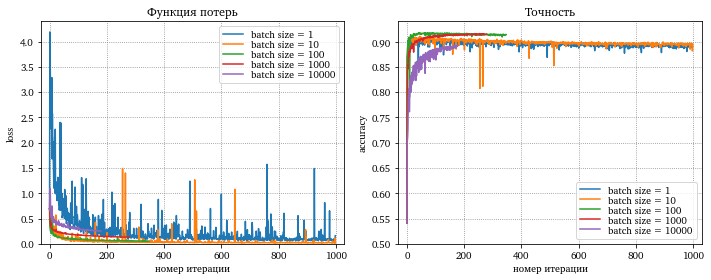

In [259]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['func']
    x = histories[batch_size]['epoch_num']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('номер итерации')
    plt.ylabel('loss')
    plt.ylim(0, 4.4)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['accuracy']
    x = histories[batch_size]['epoch_num']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('номер итерации')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/bs_sgd_b0_iter')
plt.show()

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


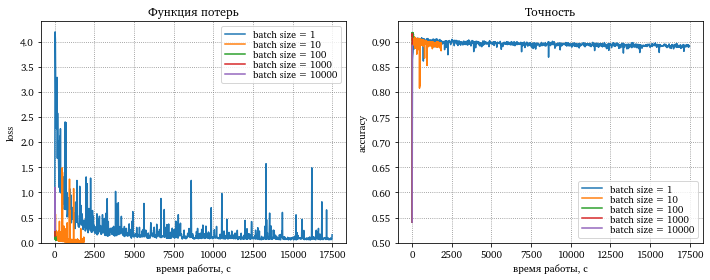

In [260]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['func']
    x = np.cumsum(histories[batch_size]['time'])
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('loss')
    plt.ylim(0, 4.4)
#     plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['accuracy']
    x = np.cumsum(histories[batch_size]['time'])
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/bs_sgd_b0_time')
plt.show()

In [29]:
histories = {}
for batch_size in batch_sizes:
    model = SGDClassifier(step_beta=0.5, batch_size=batch_size)
    histories[batch_size] = model.fit(Xtr, ytr, val_set=val_set)

 46%|████▌     | 459/1000 [2:14:25<2:38:26, 17.57s/it]


'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


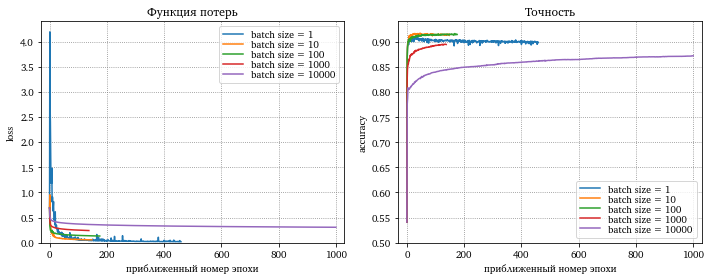

In [255]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['func']
    x = histories[batch_size]['epoch_num']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('приближенный номер эпохи')
    plt.ylabel('loss')
    plt.ylim(0, 4.4)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['accuracy']
    x = histories[batch_size]['epoch_num']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('приближенный номер эпохи')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
    plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/bs_sgd_b05_iter')
plt.show()

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


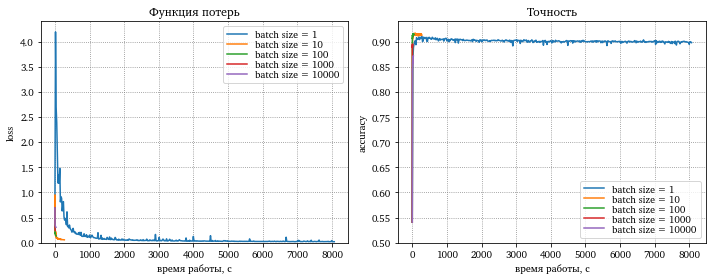

In [257]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title(f'Функция потерь')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['func']
    x = np.cumsum(histories[batch_size]['time'])
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('loss')
    plt.ylim(0, 4.4)
#     plt.xlim(-30, 1030)
plt.legend(labelspacing=0.1)
plt.subplot(1,2,2)
plt.title(r'Точность')
for batch_size in batch_sizes[::-1]:
    y = histories[batch_size]['accuracy']
    x = np.cumsum(histories[batch_size]['time'])
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('accuracy')
    plt.ylim(0.5, 0.94)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/bs_sgd_b05_time')
plt.show()

In [265]:
# times = {'gd':[], 'sgd':[]}

# for seed in range(3):
#     a = 2
#     b = 0.15
#     model = GDClassifier(max_iter=2000, step_alpha=a, step_beta=b)
#     history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
#     times['gd'].append((history['time'], history['func'], history['accuracy']))
#     print((model.predict(X_test) == y_test).mean())
#     model = SGDClassifier(max_iter=2000, step_alpha=a, step_beta=b, random_seed=seed)
#     history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
#     times['sgd'].append((history['time'], history['func'], history['accuracy']))
#     print((model.predict(X_test) == y_test).mean())

  0%|          | 1/2000 [00:00<04:10,  7.98it/s]

0.8497775198297544


  0%|          | 3/2000 [00:00<01:21, 24.38it/s]

0.8854227123234668


  0%|          | 0/2000 [00:00<?, ?it/s]

0.8495356935577482


  0%|          | 2/2000 [00:00<01:56, 17.21it/s]

0.8860030953762816


  0%|          | 0/2000 [00:00<?, ?it/s]

0.8496807893209518


  6%|▋         | 125/2000 [00:15<03:50,  8.12it/s]

0.886873669955504


In [268]:
times = {'gd':[], 'sgd':[]}

for seed in range(3):
    a = 1.5
    b = 0.05
    model = GDClassifier(max_iter=2000, step_alpha=a, step_beta=b)
    history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
    times['gd'].append((history['time'], history['func'], history['accuracy']))
    print((model.predict(X_test) == y_test).mean())
    model = SGDClassifier(max_iter=2000, step_alpha=a, step_beta=b, random_seed=seed)
    history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
    times['sgd'].append((history['time'], history['func'], history['accuracy']))
    print((model.predict(X_test) == y_test).mean())

  0%|          | 1/2000 [00:00<03:30,  9.51it/s]

0.863948539369317


  0%|          | 3/2000 [00:00<01:22, 24.26it/s]

0.886051460630683


  0%|          | 1/2000 [00:00<03:48,  8.75it/s]

0.863948539369317


  0%|          | 3/2000 [00:00<01:14, 26.79it/s]

0.886051460630683


  0%|          | 1/2000 [00:00<03:44,  8.89it/s]

0.863948539369317


 10%|▉         | 198/2000 [00:24<03:40,  8.17it/s]

0.8877442445347262


In [270]:
# times = {'gd':[], 'sgd':[]}

# for seed in range(3):
#     a = 0.95
#     b = 0.05
#     model = GDClassifier(max_iter=2000, step_alpha=a, step_beta=b)
#     history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
#     times['gd'].append((history['time'], history['func'], history['accuracy']))
#     print((model.predict(X_test) == y_test).mean())
#     model = SGDClassifier(max_iter=2000, step_alpha=a, step_beta=b, random_seed=seed)
#     history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
#     times['sgd'].append((history['time'], history['func'], history['accuracy']))
#     print((model.predict(X_test) == y_test).mean())

  0%|          | 0/2000 [00:00<?, ?it/s]

0.8290771909460244


  0%|          | 2/2000 [00:00<01:51, 17.90it/s]

0.8875991487715226


  0%|          | 1/2000 [00:00<03:30,  9.51it/s]

0.8291739214548268


  0%|          | 3/2000 [00:00<01:36, 20.63it/s]

0.8871638614819114


  0%|          | 0/2000 [00:00<?, ?it/s]

0.8291739214548268


  7%|▋         | 135/2000 [00:16<03:43,  8.36it/s]


0.8867285741923002


In [272]:
times = {'gd':[], 'sgd':[]}

for seed in range(3):
    a = 10
    b = 0.5
    model = GDClassifier(max_iter=2000, step_alpha=a, step_beta=b)
    history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
    times['gd'].append((history['time'], history['func'], history['accuracy']))
    print((model.predict(X_test) == y_test).mean())
    model = SGDClassifier(max_iter=2000, step_alpha=a, step_beta=b, random_seed=seed)
    history = model.fit(Xtr, ytr, w_0=rng(seed).uniform(-lim_rev, lim_rev, size=n), val_set=val_set)
    times['sgd'].append((history['time'], history['func'], history['accuracy']))
    print((model.predict(X_test) == y_test).mean())

  0%|          | 0/2000 [00:00<?, ?it/s]

0.8708647707486942


  0%|          | 2/2000 [00:00<01:49, 18.32it/s]

0.886486747920294


  0%|          | 1/2000 [00:00<03:25,  9.71it/s]

0.8708164054942928


  0%|          | 3/2000 [00:00<01:27, 22.84it/s]

0.8861481911394854


  0%|          | 0/2000 [00:00<?, ?it/s]

0.8708164054942928


  3%|▎         | 54/2000 [00:06<03:52,  8.38it/s]

0.8866318436834978


'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


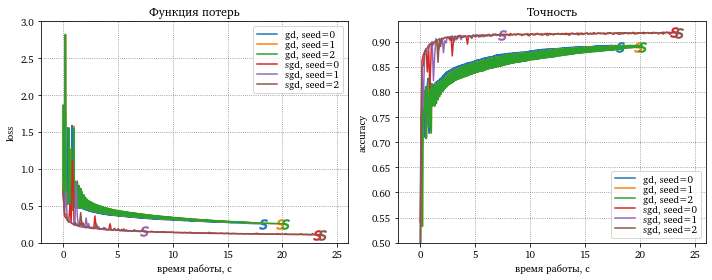

In [318]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title(f'Функция потерь')
plt.xlabel('время работы, с')
plt.ylabel('loss')
for t in times:
    for i, (s, y, _) in enumerate(times[t]):
        x = np.cumsum(s)
        plt.plot(x, np.array(y), label=f'{t}, seed={i}')
        plt.scatter(x[-1], y[-1], marker='$S$', s=90)
plt.ylim(0, 3)
plt.legend(labelspacing=0.1)
plt.xlim(-2, 26)
plt.subplot(1,2,2)
plt.title(r'Точность')
plt.xlabel('время работы, с')
plt.ylabel('accuracy')
for t in times:
    for i, (s, _, y) in enumerate(times[t]):
        x = np.cumsum(s)
        plt.plot(x, y, label=f'{t}, seed={i}')
        plt.scatter(x[-1], y[-1], marker='$S$', s=90)
plt.ylim(0.5, 0.94)
plt.xlim(-2, 26)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/times2')
plt.show()

'XCharter-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


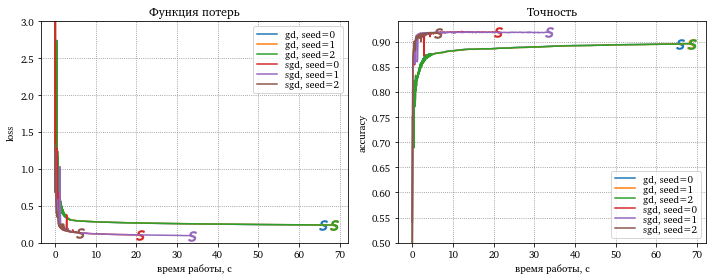

In [314]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.title(f'Функция потерь')
plt.xlabel('время работы, с')
plt.ylabel('loss')
for t in times:
    for i, (s, y, _) in enumerate(times[t]):
        x = np.cumsum(s)
        plt.plot(x, np.array(y), label=f'{t}, seed={i}')
        plt.scatter(x[-1], y[-1], marker='$S$', s=90)
plt.ylim(0, 3)
plt.legend(labelspacing=0.1)

plt.subplot(1,2,2)
plt.title(r'Точность')
plt.xlabel('время работы, с')
plt.ylabel('accuracy')
for t in times:
    for i, (s, _, y) in enumerate(times[t]):
        x = np.cumsum(s)
        plt.plot(x, y, label=f'{t}, seed={i}')
        plt.scatter(x[-1], y[-1], marker='$S$', s=90)
plt.ylim(0.5, 0.94)
plt.legend(labelspacing=0.1)
plt.tight_layout()
plt.savefig('vis/times4')
plt.show()

# baseline

 34%|███▍      | 341/1000 [00:45<01:28,  7.45it/s]


0.88788934029793


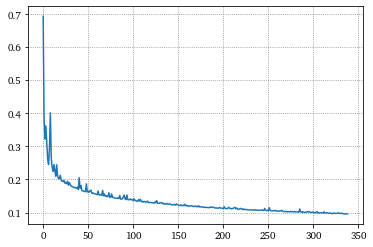

In [346]:
model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
hm = model.fit(X_train, y_train)
plt.plot(hm['func'])
print((model.predict(X_test) == y_test).mean())

# Лемматизация и удаление стоп-слов

In [379]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def lemmitize_dataset(X):
    wnl = WordNetLemmatizer()
    X_lem = []
    for sentence in X:
        X_lem.append(' '.join(wnl.lemmatize(word) for word in sentence.split()))
    return X_lem

In [373]:
from sklearn.feature_extraction.text import CountVectorizer

kwargss = [
    {'min_df': 5},
    {'min_df': 5, 'stop_words': stopwords.words('english'),},
]

funcs = []
for kwargs in kwargss:
    
    vectorizer = CountVectorizer(**kwargs)
    X_train = vectorizer.fit_transform(X_train_corpus)
    X_test = vectorizer.transform(X_test_corpus)
    print(X_train.shape)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    funcs.append([np.cumsum(hmm['time']), hmm['func']])
    print((model.predict(X_test) == y_test).mean())
    
    vectorizer = CountVectorizer(**kwargs)
    X_train = vectorizer.fit_transform(lemmitize_dataset(X_train_corpus))
    X_test = vectorizer.transform(lemmitize_dataset(X_test_corpus))
    print(X_train.shape)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    funcs.append([np.cumsum(hmm['time']), hmm['func']])
    print((model.predict(X_test) == y_test).mean())

  0%|          | 1/1000 [00:00<02:06,  7.87it/s]

(52061, 18253)


 34%|███▍      | 341/1000 [00:46<01:29,  7.37it/s]


0.88788934029793


  0%|          | 1/1000 [00:00<02:14,  7.45it/s]

(52061, 16374)


 41%|████      | 410/1000 [00:56<01:21,  7.21it/s]


0.88788934029793


  0%|          | 1/1000 [00:00<01:42,  9.77it/s]

(52061, 18109)


 25%|██▌       | 250/1000 [00:33<01:41,  7.40it/s]


0.8859547301218804


  0%|          | 1/1000 [00:00<01:53,  8.80it/s]

(52061, 16234)


 17%|█▋        | 171/1000 [00:23<01:51,  7.43it/s]

0.887067130973109


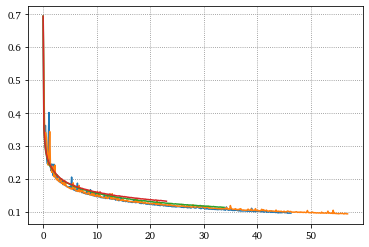

In [375]:
for x, y in funcs:
    plt.plot(x, y)

In [376]:
X_train_corpus = lemmitize_dataset(X_train_corpus)
X_test_corpus = lemmitize_dataset(X_test_corpus)

In [381]:
for min_df in [1, 3, 5, 10, 15]:
    vectorizer = CountVectorizer(min_df=min_df)
    X_train = vectorizer.fit_transform(X_train_corpus)
    X_test = vectorizer.transform(X_test_corpus)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('cv', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())
    
    tfidfer = TfidfTransformer()
    tfidfer.fit(X_train)
    X_train = tfidfer.transform(X_train)
    X_test = tfidfer.transform(X_test)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('tf', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())

 26%|██▋       | 263/1000 [00:41<01:56,  6.35it/s]


cv 1 82991 0.8902592377635906


 57%|█████▋    | 567/1000 [01:28<01:07,  6.42it/s]


tf 1 82991 0.8929193267556588


 28%|██▊       | 278/1000 [00:39<01:43,  7.00it/s]


cv 3 23925 0.8875507835171214


 29%|██▉       | 288/1000 [00:39<01:37,  7.30it/s]


tf 3 23925 0.8916134648868254


 41%|████      | 410/1000 [00:57<01:22,  7.18it/s]


cv 5 16374 0.88788934029793


 29%|██▉       | 288/1000 [00:38<01:34,  7.50it/s]


tf 5 16374 0.8916618301412266


 29%|██▊       | 286/1000 [00:39<01:37,  7.33it/s]


cv 10 10210 0.8896304894563746


 29%|██▉       | 288/1000 [00:37<01:33,  7.65it/s]


tf 10 10210 0.891565099632424


  0%|          | 0/1000 [00:00<?, ?it/s]

cv 15 7945 0.8900174114915844


 29%|██▉       | 288/1000 [00:13<00:32, 21.88it/s]

tf 15 7945 0.8921938479396402


In [382]:
for min_df in [20, 25, 30]:
    vectorizer = CountVectorizer(min_df=min_df)
    X_train = vectorizer.fit_transform(X_train_corpus)
    X_test = vectorizer.transform(X_test_corpus)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('cv', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())
    
    tfidfer = TfidfTransformer()
    tfidfer.fit(X_train)
    X_train = tfidfer.transform(X_train)
    X_test = tfidfer.transform(X_test)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('tf', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())

  0%|          | 0/1000 [00:00<?, ?it/s]

cv 20 6646 0.8912749081060166


 17%|█▋        | 169/1000 [00:07<00:37, 21.94it/s]


tf 20 6646 0.8894853936931708


  0%|          | 0/1000 [00:00<?, ?it/s]

cv 25 5801 0.889098471657961


 17%|█▋        | 169/1000 [00:07<00:37, 21.95it/s]


tf 25 5801 0.8903559682723932


  0%|          | 0/1000 [00:00<?, ?it/s]

cv 30 5163 0.8849390597794544


 33%|███▎      | 332/1000 [00:14<00:28, 23.09it/s]

tf 30 5163 0.8934513445540724


In [383]:
for min_df in [35, 40, 45]:
    vectorizer = CountVectorizer(min_df=min_df)
    X_train = vectorizer.fit_transform(X_train_corpus)
    X_test = vectorizer.transform(X_test_corpus)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('cv', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())
    
    tfidfer = TfidfTransformer()
    tfidfer.fit(X_train)
    X_train = tfidfer.transform(X_train)
    X_test = tfidfer.transform(X_test)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print('tf', min_df, X_train.shape[1], (model.predict(X_test) == y_test).mean())

  0%|          | 0/1000 [00:00<?, ?it/s]

cv 35 4705 0.884648868253047


 33%|███▎      | 332/1000 [00:14<00:29, 22.49it/s]


tf 35 4705 0.8923873089572452


  0%|          | 0/1000 [00:00<?, ?it/s]

cv 40 4298 0.8881795318243374


 32%|███▏      | 316/1000 [00:14<00:30, 22.07it/s]


tf 40 4298 0.8925324047204488


  0%|          | 0/1000 [00:00<?, ?it/s]

cv 45 3982 0.8837299284194234


 30%|███       | 302/1000 [00:12<00:30, 23.25it/s]

tf 45 3982 0.890742890307603


In [410]:
from sklearn.feature_extraction.text import TfidfVectorizer

for i in range(1, 6):
    tfidfer = TfidfVectorizer(min_df=25, max_df=0.1, ngram_range=(1, i))
    X_train = tfidfer.fit_transform(X_train_corpus)
    X_test = tfidfer.transform(X_test_corpus)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    print(X_train.shape[1], (model.predict(X_test) == y_test).mean())

 40%|███▉      | 399/1000 [00:18<00:27, 22.05it/s]


5747 0.8934029792996712


 32%|███▏      | 324/1000 [00:43<01:30,  7.48it/s]


18034 0.8923873089572452


 42%|████▏     | 417/1000 [00:58<01:22,  7.07it/s]


23092 0.8926775004836526


 46%|████▋     | 463/1000 [01:07<01:18,  6.88it/s]


24914 0.8929193267556588


 46%|████▋     | 463/1000 [01:06<01:16,  7.01it/s]

26288 0.8926775004836526


In [391]:
accsbow = []
accstfidf = []
for mdf in [1., 0.3, 0.15, 0.1, 0.05]:
    vectorizer = CountVectorizer(min_df=25, max_df=mdf)
    X_train = vectorizer.fit_transform(X_train_corpus)
    X_test = vectorizer.transform(X_test_corpus)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    lens += [X_train.shape[1]]
    accsbow += [(model.predict(X_test) == y_test).mean()]
    
    tfidfer = TfidfTransformer()
    tfidfer.fit(X_train)
    X_train = tfidfer.transform(X_train)
    X_test = tfidfer.transform(X_test)
    model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
    hmm = model.fit(X_train, y_train)
    accstfidf += [(model.predict(X_test) == y_test).mean()]

 42%|████▏     | 417/1000 [00:16<00:23, 25.12it/s]


In [413]:
tfidfer = TfidfVectorizer(min_df=25, max_df=0.1)
X_train = tfidfer.fit_transform(X_train_corpus)
X_test = tfidfer.transform(X_test_corpus)

In [416]:
model = SGDClassifier(step_alpha=1.5, step_beta=0.05)
model.fit(X_train, y_train)
y1 = model.predict_proba(X_test)[:, 1]

 40%|███▉      | 399/1000 [00:15<00:23, 25.18it/s]


In [429]:
(np.where(y1>0.5, 1, -1) == y_test).mean()

0.8934029792996712

In [433]:
mistakes = (np.where(y1>0.5, 1, -1) != y_test)

In [1]:
with open(dir0+'toxic_test.csv', 'r', newline='') as fin:
    reader = csv.reader(fin, delimiter=',')
    _ = next(reader)
    for line, flag in zip(reader, mistakes):
        if flag and line[-1] == 'False':
            print(line)
            _ = input()